<a href="https://colab.research.google.com/github/ravikanth995/Projects/blob/master/Ethanol_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('/content/EthanolProduction.csv',encoding = 'unicode_escape')
df

,S No.,Name of the sugar mill/ Distillery Unit,State,Project Approved under Scheme,Proposed Capacity (in KLPD),Loan amount recommended (Rs. in Cr.),Type of Feed-stock
0,1.0,"M/s Tikaula Sugar Mills Ltd, Distt- Muzaffarna...",Uttar Pradesh,July'2018,boiler for existing 45 KLPD,19.50,Molasses
1,2.0,"M/s Shamanur Sugars Ltd, Davangere Dist, Karna...",Karnataka,July'2018,60,43.65,Molasses
2,3.0,"M/s Shamanur Sugars Ltd, Davangere Dist, Karna...",Karnataka,July'2018,boiler for proposed 120 KLPD,32.00,Molasses
3,4.0,M/s Loknete Sunderraoji Solanke Sahakari Sakha...,Maharashtra,July'2018,45,57.80,Molasses
4,5.0,"M/s Kancheshwar Sugar Ltd, Dist- Osmanabad, Ma...",Maharashtra,July'2018,45,57.80,Molasses
...,...,...,...,...,...,...,...
891,892.0,"M/s Nahar Industrial Enterprises Ltd, Ludhiana",Punjab,July'2018,85,80.00,Molasses
892,893.0,"M/s Shri Sant Damaji SSK Ltd, Mangalwedha, Sol...",Maharashtra,July'2018,45,57.80,Molasses
893,894.0,"M/s Rena Sahakari SSK Ltd, Dilip Nagar",Maharashtra,July'2018,boiler for existing 30 KLPD,15.00,Molasses
894,895.0,NCC Radhakrishna cotton Private limited,Maharashtra,January'2021,500,298.32,Dual feed (Molasses/Grain)


In [124]:
df.shape

(896, 7)

# **Data Cleaning**

In [125]:
df.drop('S No.', axis = 1, inplace = True)

In [126]:
df['Proposed Capacity  (in KLPD)']

0       boiler for existing 45 KLPD
1                                60
2      boiler for proposed 120 KLPD
3                                45
4                                45
                   ...             
891                              85
892                              45
893     boiler for existing 30 KLPD
894                             500
895                         81529.5
Name: Proposed Capacity  (in KLPD), Length: 896, dtype: object

In [127]:
df['Proposed Capacity  (in KLPD)'] = df['Proposed Capacity  (in KLPD)'].str.replace(r'[A-Za-z]', '')

<ipython-input-127-4d9904356bc4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Proposed Capacity  (in KLPD)'] = df['Proposed Capacity  (in KLPD)'].str.replace(r'[A-Za-z]', '')


In [128]:
df['Proposed Capacity  (in KLPD)']

0          45 
1           60
2         120 
3           45
4           45
        ...   
891         85
892         45
893        30 
894        500
895    81529.5
Name: Proposed Capacity  (in KLPD), Length: 896, dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Name of the sugar mill/ Distillery Unit  895 non-null    object 
 1   State                                    895 non-null    object 
 2   Project Approved under Scheme            896 non-null    object 
 3   Proposed Capacity  (in KLPD)             896 non-null    object 
 4   Loan amount recommended (Rs. in Cr.)     896 non-null    float64
 5   Type of Feed-stock                       895 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


In [130]:
df['Proposed Capacity  (in KLPD)'] = df['Proposed Capacity  (in KLPD)'].astype(float)

In [131]:
df.dropna(inplace = True)

In [132]:
df.isna().sum()

Name of the sugar mill/ Distillery Unit    0
State                                      0
Project Approved under Scheme              0
Proposed Capacity  (in KLPD)               0
Loan amount recommended (Rs. in Cr.)       0
Type of Feed-stock                         0
dtype: int64

In [133]:
df.describe()

,Proposed Capacity (in KLPD),Loan amount recommended (Rs. in Cr.)
count,895.000000,895.000000
mean,99.710056,79.421128
std,84.232992,51.968894
min,7.000000,2.480000
25%,45.000000,43.500000
50%,60.000000,68.120000
75%,120.000000,100.000000
max,660.000000,298.320000


In [134]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
890    False
891    False
892    False
893    False
894     True
Length: 895, dtype: bool

In [135]:
df.drop_duplicates(inplace = True)

In [136]:
df.shape

(893, 6)

In [137]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'State ',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

In [138]:
df.rename(columns = {'State ':'States'}, inplace  = True)

In [139]:
df['States'] = df['States'].str.replace('Uttar pradesh', 'Uttar Pradesh')
df['States'] = df['States'].str.replace('Mahrashtra','Maharashtra')
df['States'] = df['States'].str.replace('Madhya pradesh','Madhya Pradesh')

In [140]:
df['States'] = df['States'].str.replace(' Uttar Pradesh','Uttar Pradesh')

In [141]:
specific_row = df[df['States'] == 'Uttar Pradesh']
specific_row


,Name of the sugar mill/ Distillery Unit,States,Project Approved under Scheme,Proposed Capacity (in KLPD),Loan amount recommended (Rs. in Cr.),Type of Feed-stock
0,"M/s Tikaula Sugar Mills Ltd, Distt- Muzaffarna...",Uttar Pradesh,July'2018,45.0,19.50,Molasses
9,"M/s Gobind Sugar Mills Ltd, Lakhimpur Kheri, U...",Uttar Pradesh,July'2018,100.0,96.60,Molasses
33,M/s DCM Shriram Industries Ltd(Daurala Sugar W...,Uttar Pradesh,July'2018,150.0,20.00,Molasses
46,"M/s Dwarikesh Sugar Industries Ltd, Dwarikesh ...",Uttar Pradesh,July'2018,70.0,72.98,Molasses
49,"M/s Uttam Sugar Mills Ltd, Pudrikhurd, Distt. ...",Uttar Pradesh,July'2018,150.0,28.00,Molasses
...,...,...,...,...,...,...
859,Triveni Engineering & Industries Ltd Alco Chem...,Uttar Pradesh,January'2021,160.0,36.22,Dual feed (Molasses/Grain)
860,Triveni Engineering & Industries Limited Disti...,Uttar Pradesh,January'2021,160.0,36.22,Dual feed (Molasses/Grain)
861,Star Light Bruchem Ltd,Uttar Pradesh,January'2021,60.0,30.00,Dual feed (Molasses/Grain)
862,SVP INDUSTRIES LTD(UNIT: SIR SHADILAL DISTILLE...,Uttar Pradesh,January'2021,100.0,25.00,Dual feed (Molasses/Grain)


In [142]:
row = df[df['States'] == 'West Bengal ']
row

,Name of the sugar mill/ Distillery Unit,States,Project Approved under Scheme,Proposed Capacity (in KLPD),Loan amount recommended (Rs. in Cr.),Type of Feed-stock
822,MAHAK LIMITED,West Bengal,January'2021,225.0,170.0,Dual feed (Molasses/Grain)


In [144]:
df['States'] == df['States'].str.replace('West Bengal ','West Bengal')

0      True
1      True
2      True
3      True
4      True
       ... 
889    True
890    True
891    True
892    True
893    True
Name: States, Length: 893, dtype: bool

# **EDA**

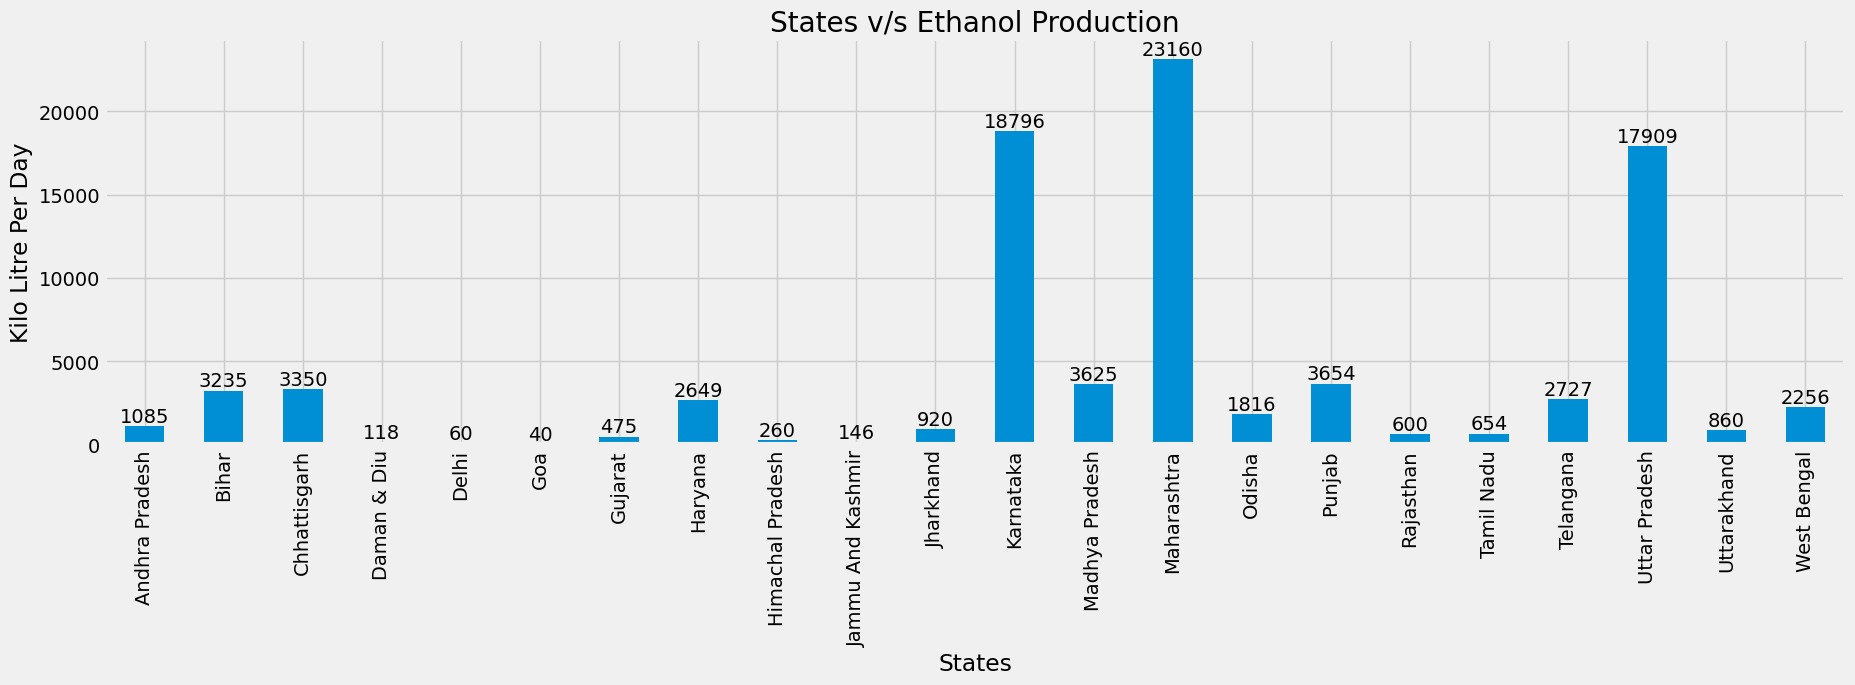

In [149]:
plt.figure(figsize = (20,5))
plt.style.use('fivethirtyeight')
data = df.groupby('States')['Proposed Capacity  (in KLPD)'].sum()
data_to_plot = data.iloc[:-1] # To remove last graph due to incoorect format

ax = data_to_plot.plot(kind='bar')

plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')
plt.title("States v/s Ethanol Production")
plt.xlabel("States")
plt.ylabel("Kilo Litre Per Day")
plt.show()

Highest Production of Ethanol Kilo lItres Per Day(KLPD) is of Mahasrahtra State(23160Kl/d) followed by the Karnataka(18796 Kl/d) and Uttar Pradesh(17909 Kl/d).
The Least number of Ethanol Production was in Goa and Delhi.

In [146]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

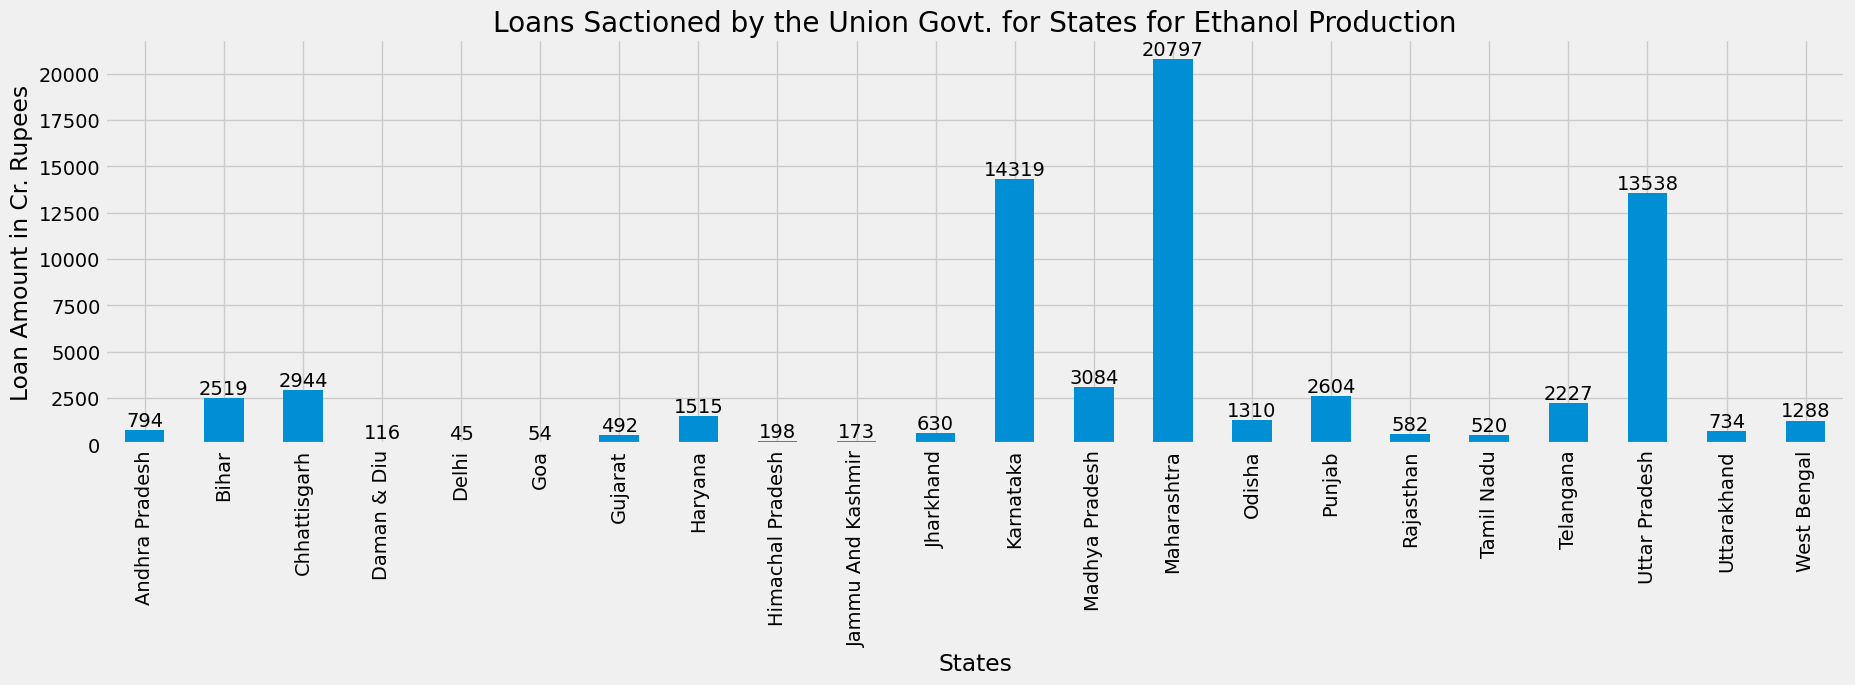

In [150]:
plt.figure(figsize = (20,5))
plt.style.use('fivethirtyeight')
data = df.groupby('States')['Loan amount recommended (Rs. in Cr.)'].sum()
data_to_plot = data.iloc[:-1] # To remove last graph due to incoorect format

ax = data_to_plot.plot(kind='bar')

plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')
plt.title("Loans Sactioned by the Union Govt. for States for Ethanol Production")
plt.ylabel("Loan Amount in Cr. Rupees")
plt.xlabel("States")
plt.show()

Union Government has sanctioned the highest amount to the Maharashtra State(20,797Cr Rupees), Karnataka State (14,313Cr) and to the Uttar Pradesh State (13, 538 Cr.) 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Karnataka'),
  Text(2, 0, 'Maharashtra'),
  Text(3, 0, 'Andhra Pradesh'),
  Text(4, 0, 'Tamil Nadu'),
  Text(5, 0, 'Punjab'),
  Text(6, 0, 'Uttarakhand'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Madhya Pradesh'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Bihar'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Delhi'),
  Text(13, 0, 'Telangana'),
  Text(14, 0, 'Chhattisgarh'),
  Text(15, 0, 'Jammu And Kashmir'),
  Text(16, 0, 'Jharkhand'),
  Text(17, 0, 'Rajasthan'),
  Text(18, 0, 'West Bengal'),
  Text(19, 0, 'Odisha'),
  Text(20, 0, 'Goa'),
  Text(21, 0, 'West Bengal '),
  Text(22, 0, 'Daman & Diu')])

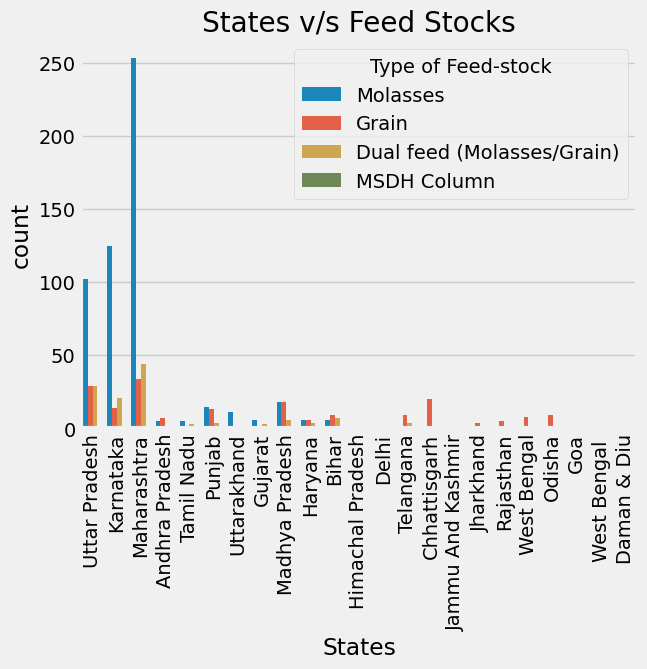

In [160]:

sns.countplot(x = 'States', hue = 'Type of Feed-stock', data = df)
plt.title("States v/s Feed Stocks")
plt.xlabel("States")
plt.xticks(rotation  = 90)

Maharashtra State has the Highest of Molasses, Grain and Dual, it has more of Dual Feeds than Grain Feed.
Karnataka also has the same Feed Stocks as Maharashtra State joined by the Uttar Pradesh. 

In [161]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

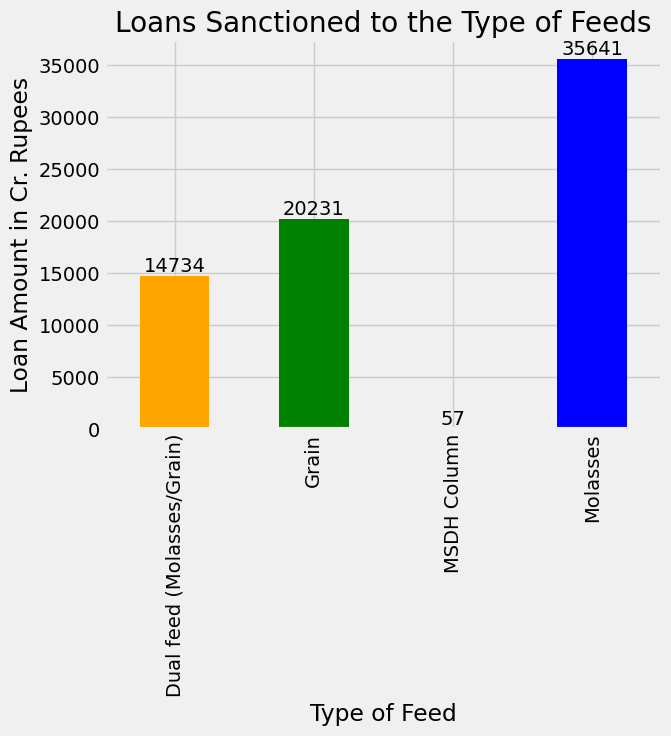

In [169]:
# plt.figure(figsize = (20,5))
plt.style.use('fivethirtyeight')
data = df.groupby('Type of Feed-stock')['Loan amount recommended (Rs. in Cr.)'].sum() 
colors = ['orange','green','magenta','blue']
ax = data.plot(kind='bar', color = colors)

plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')
plt.title("Loans Sanctioned to the Type of Feeds")
plt.ylabel("Loan Amount in Cr. Rupees")
plt.xlabel("Type of Feed")
plt.show()

Highest of Loan was sanctioned to the Molasses (35,641 Cr. Rupees) followed by the Grains ( 20,231 Cr. Rupees) and Dual feed(Molasses and Grain(14,734 Cr. Rupees). 

In [170]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

Text(0.5, 1.0, 'Project Approved Dates v/s States')

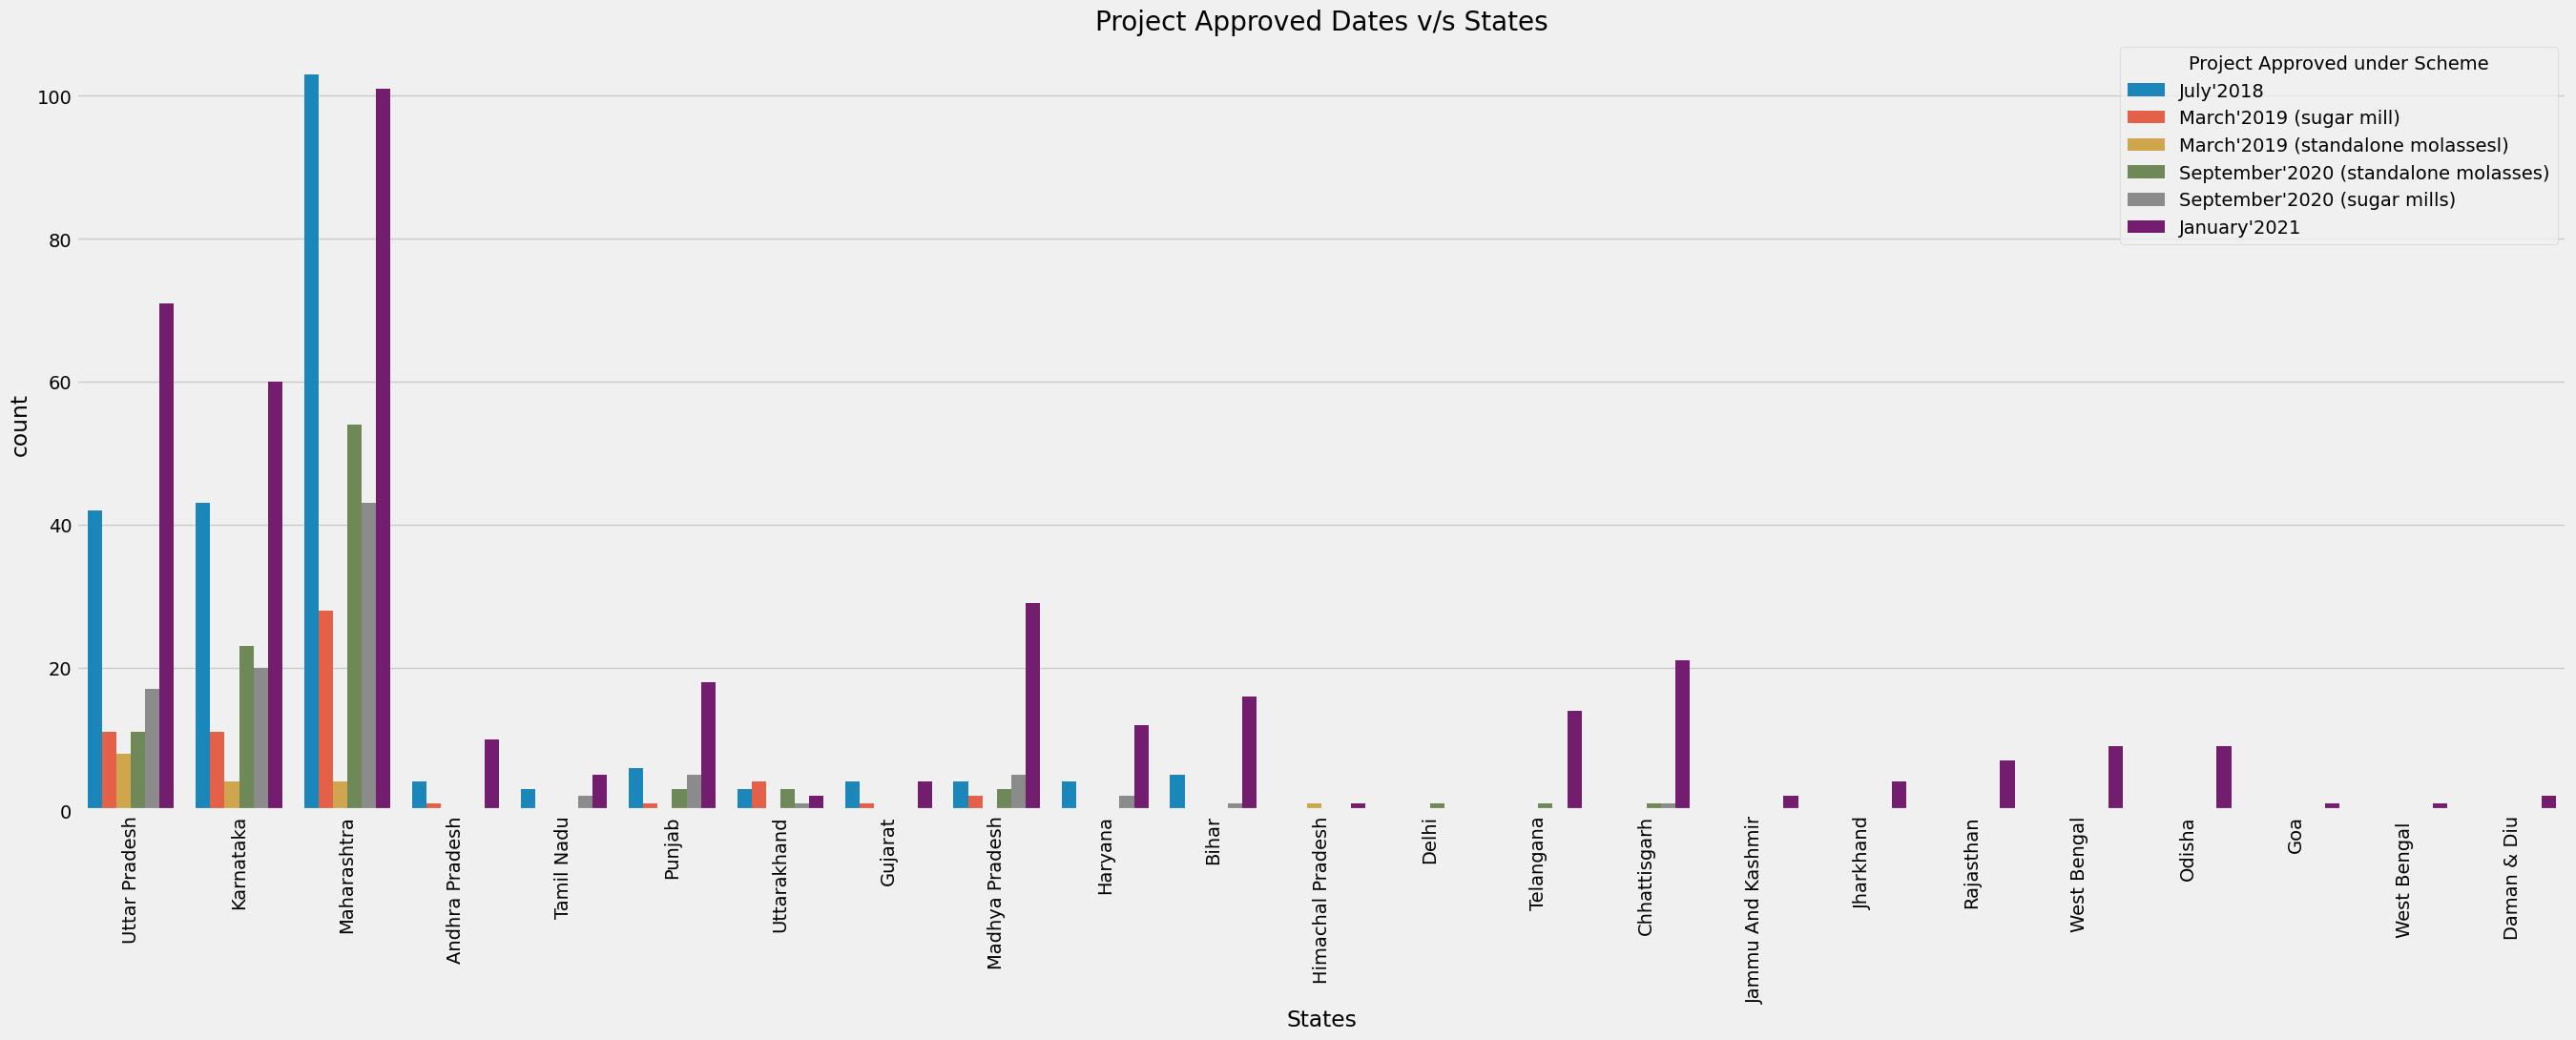

In [199]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'States', hue = 'Project Approved under Scheme', data = df)
plt.xticks(rotation  = 90)
plt.title("Project Approved Dates v/s States")

Projects was started in July 2018. March 2019 for Sugar Mills and Stand alone Molasses.
Again, for next year, March, 2020 for Stand alone Molasses.
September 2020, for Sugar Mills.
In January 2021, All over India.


In [177]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

Text(0.5, 1.0, 'Project Time v/s Loans')

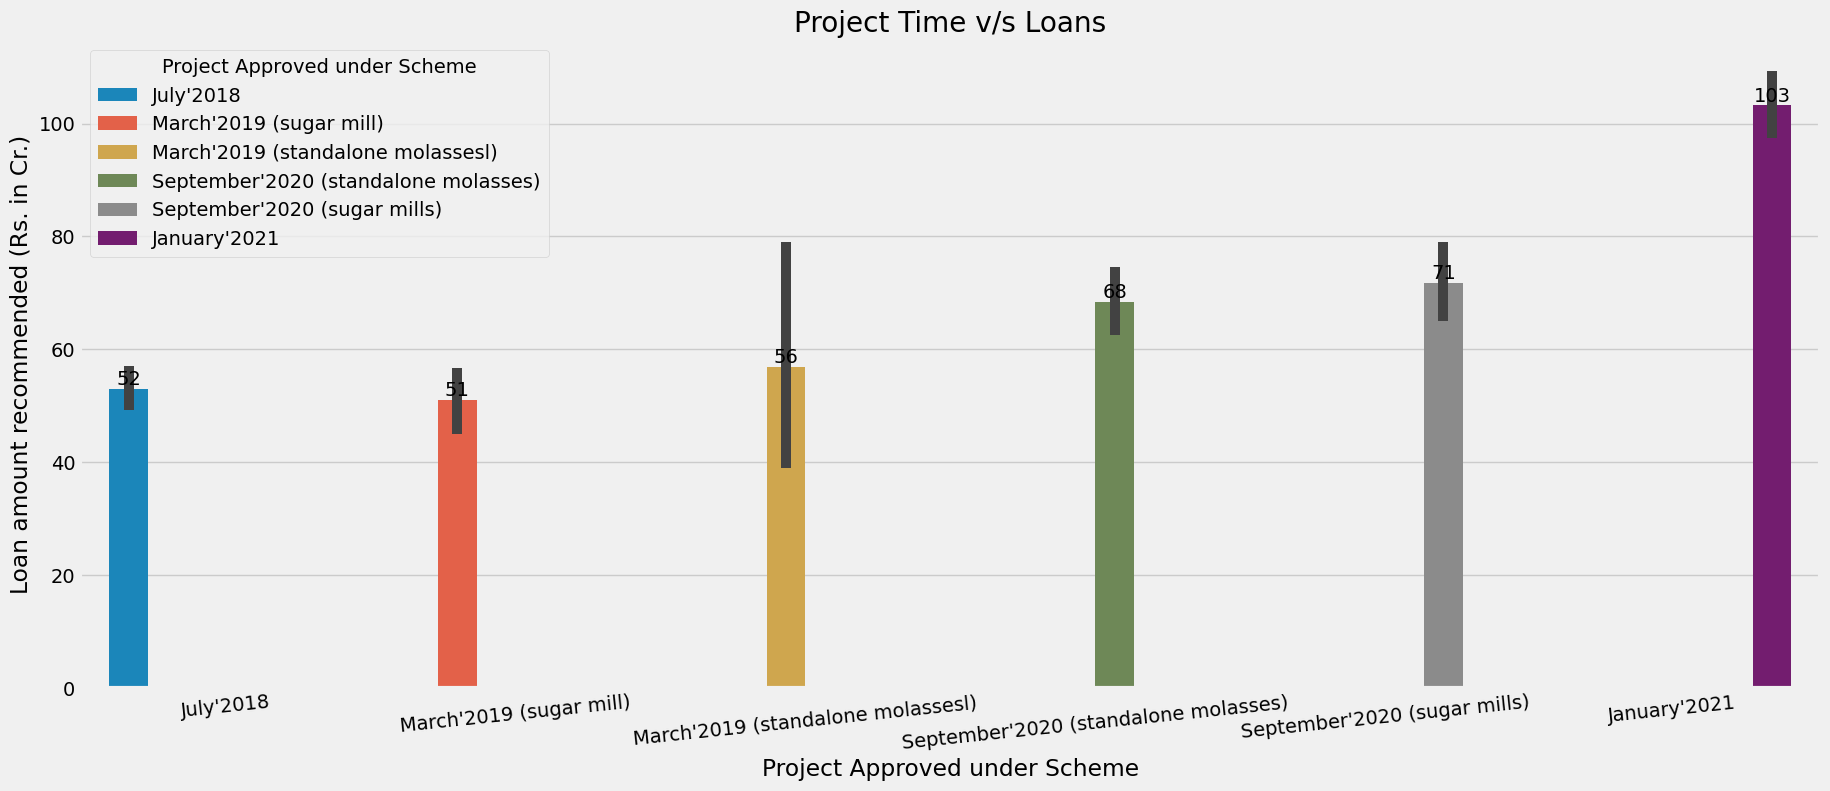

In [200]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = 'Project Approved under Scheme', y = 'Loan amount recommended (Rs. in Cr.)',hue = 'Project Approved under Scheme', data = df)
plt.bar_label(ax.containers[0], fmt = '%d', label_type= 'edge')
plt.bar_label(ax.containers[1], fmt = '%d', label_type= 'edge')
plt.bar_label(ax.containers[2], fmt = '%d', label_type= 'edge')
plt.bar_label(ax.containers[3], fmt = '%d', label_type= 'edge')
plt.bar_label(ax.containers[4], fmt = '%d', label_type= 'edge')
plt.bar_label(ax.containers[5], fmt = '%d', label_type= 'edge')
plt.xticks(rotation = 6)

plt.title("Project Time v/s Loans")

Amount Sanctioned under the scheme on July 2018 was 52Cr. Rupees, March 2019 for Sugar Mills was 51Cr. Rupees and for Stand alone Molasses was 56Cr. rupees.
In Sept, 2020 too it was 63 Cr. rupees and for Sugar mills was 71 Cr. rupees.
In January 2021, it was 103Cr. Rupees.


In [198]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

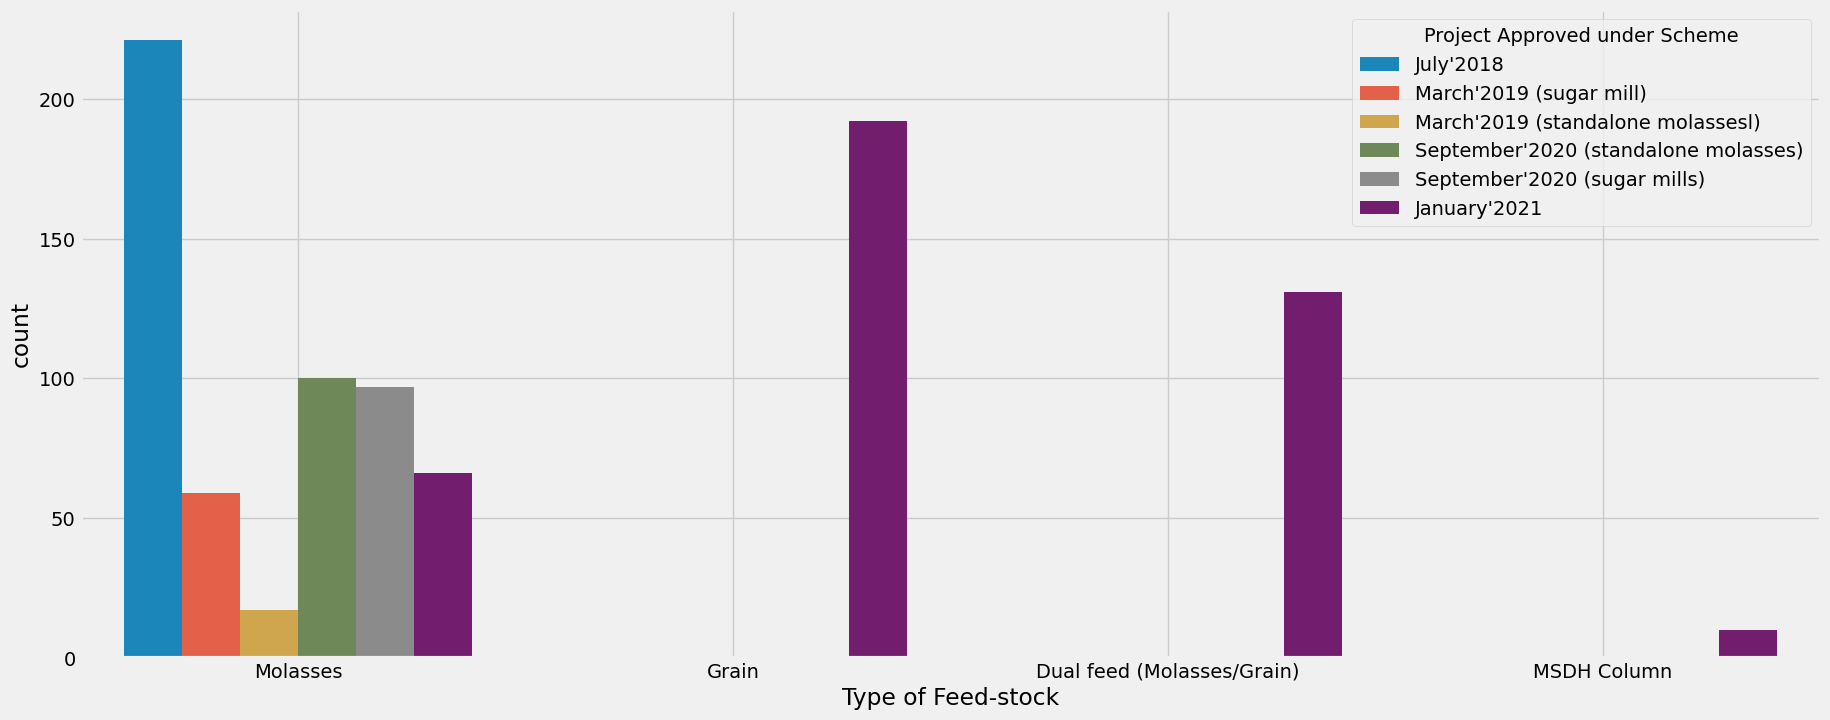

In [209]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Type of Feed-stock', hue = 'Project Approved under Scheme', data = df)
plt.grid(True)

Beginning from the Project time, focus was build on the Molasses and then on others like Grains.

In [210]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

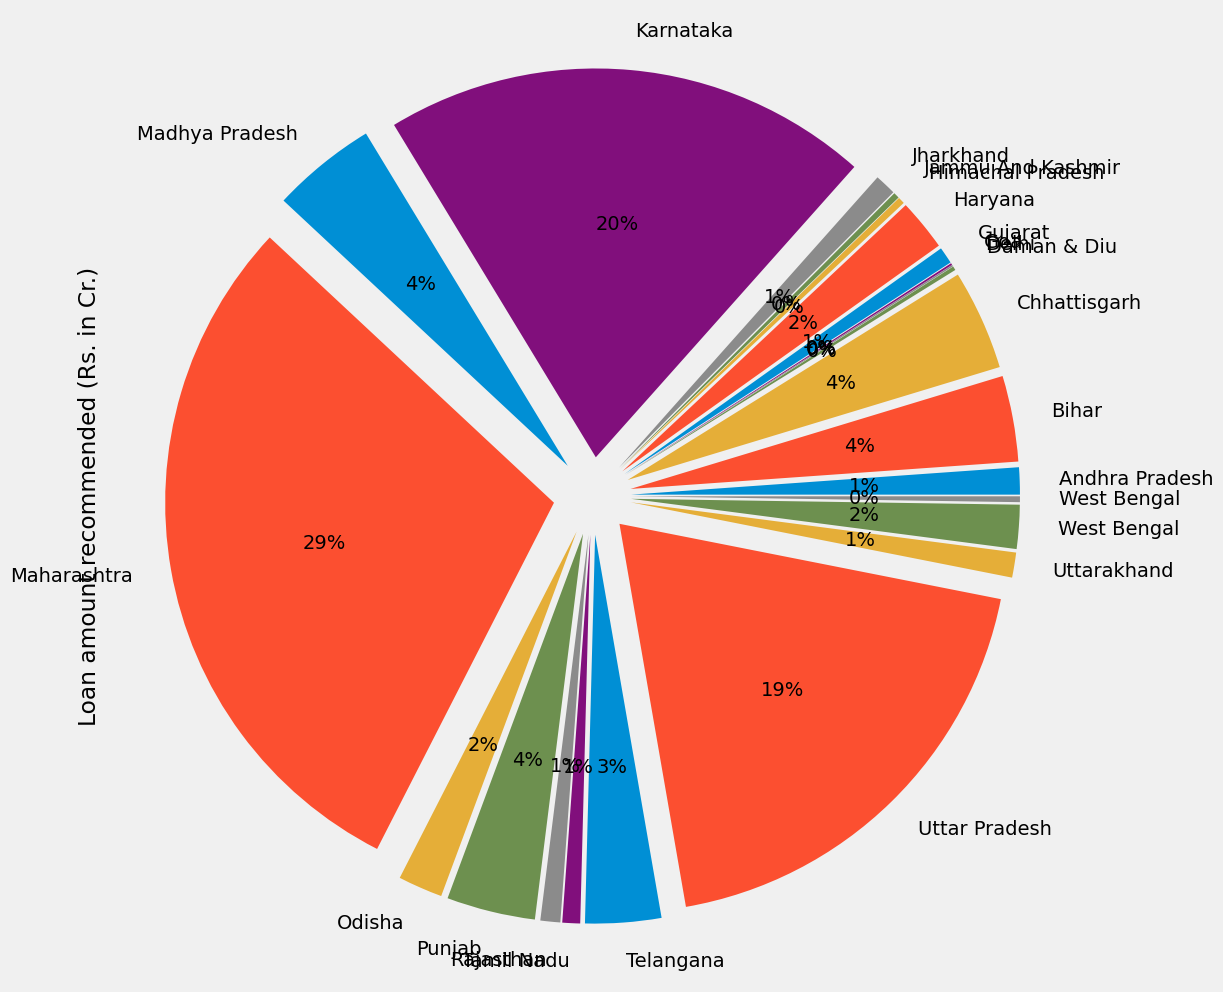

In [232]:
plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')
explode = [0.1]*23
data = df.groupby('States')['Loan amount recommended (Rs. in Cr.)'].sum()
data.plot(kind = 'pie', autopct='%.0f%%', explode = explode)
plt.show()

68% of the Loan Amount Recommended was held by Maharashtra, Karnataka and Uttar Pradesh States.

In [233]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

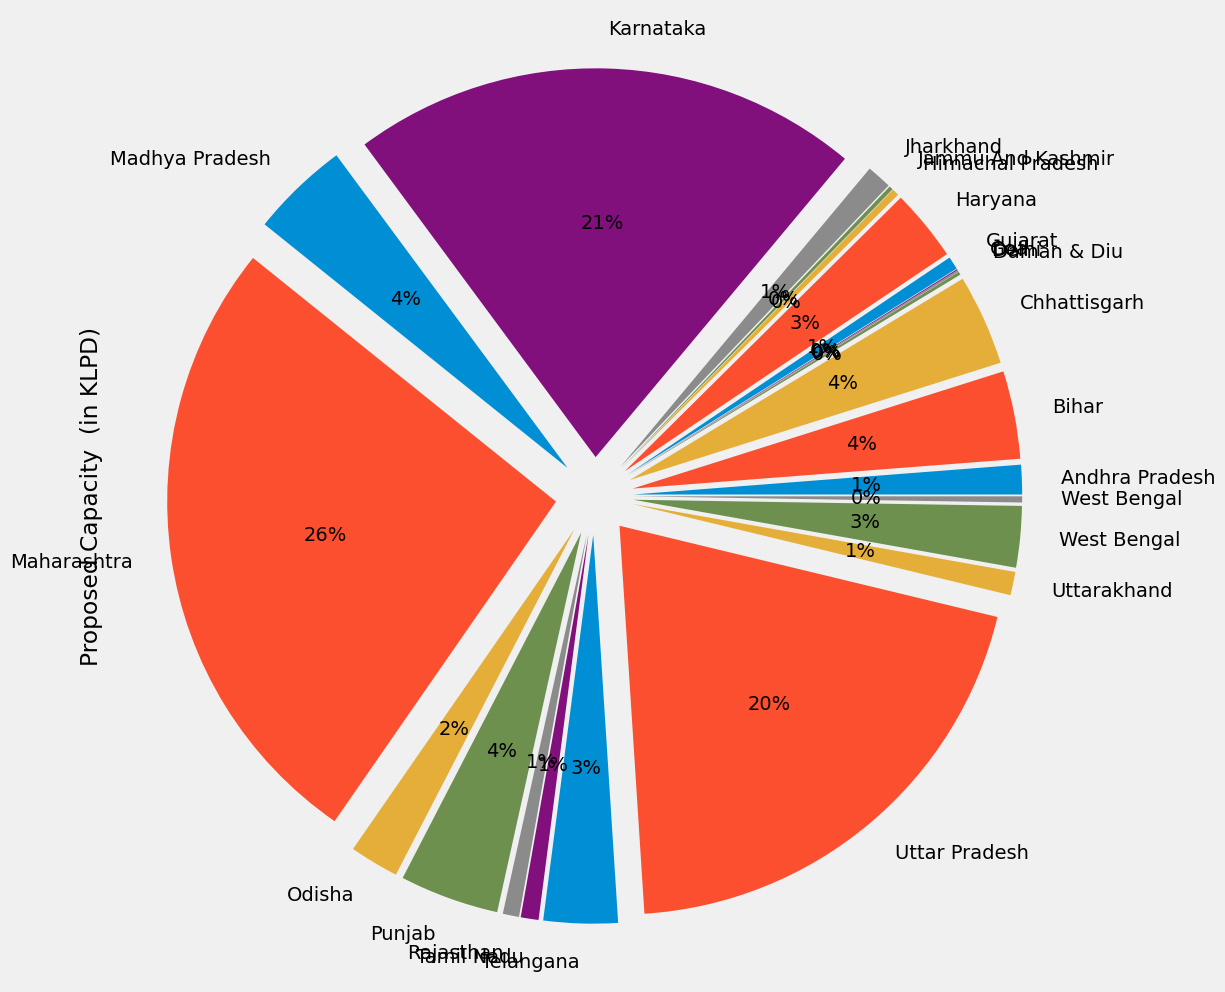

In [238]:
plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')
explode = [0.1]*23
data = df.groupby('States')['Proposed Capacity  (in KLPD)'].sum()
data.plot(kind = 'pie', autopct='%.0f%%', explode = explode)
plt.show()

Capacity Production for the Ethanol was 26% in Maharashtra, 21% in Karnataka and 20% in UP followed by 4% in MP.

In [239]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

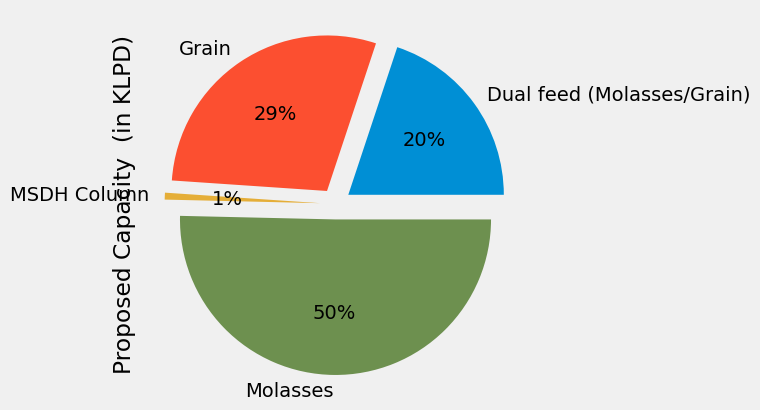

In [250]:
# plt.figure(figsize = (20,12))
plt.style.use('fivethirtyeight')
# explode = [0.1]*4
data = df.groupby('Type of Feed-stock')['Proposed Capacity  (in KLPD)'].sum()
data.plot(kind = 'pie', autopct='%.0f%%', explode =explode)
plt.show()

Molasses constitutes about 50% of the Capacity Production of Methanol, 29% was held by the Grain,20% by Dual Feed(Molass/Grain) and 1% by MSDH.

In [251]:
df.columns

Index(['Name of the sugar mill/ Distillery Unit', 'States',
       'Project Approved under Scheme', 'Proposed Capacity  (in KLPD)',
       'Loan amount recommended (Rs. in Cr.)', 'Type of Feed-stock'],
      dtype='object')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Dual feed (Molasses/Grain)'),
  Text(1, 0, 'Grain'),
  Text(2, 0, 'MSDH Column'),
  Text(3, 0, 'Molasses')])

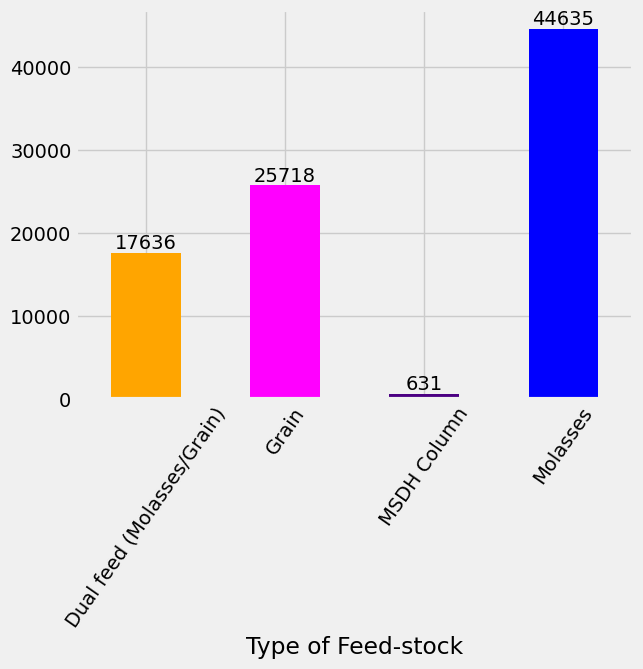

In [262]:
# plt.figure(figsize = (15,5))

plt.style.use('fivethirtyeight')
data = df.groupby('Type of Feed-stock')['Proposed Capacity  (in KLPD)'].sum()
colors = ['orange','magenta','indigo','blue']
ax = data.plot(kind='bar', color = colors)
plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge')
plt.xticks(rotation = 55)

**Conclusion :** Maharahstra, Karnataka and Uttar Pradesh tops the list in Molasses, grain and in Both for the Producion and Loans Sanctioned for the same.
The Project was launched in the 2018 with the scope to handle Climate Change and Balance of Payment.

Methanol Production must be produced by the Every State inorder to tackle the Climate Change and Oil and Coal Imports from the OECD countries, in which we can save much amount which can be spent our Infrastructure and Development. 

Government must encourage farmers to do Sugarcane farming in more aggressive and Scientific Manner to Substitute the Coal and Oils imports.

Government must invest huge money into this sector which can bring good money to our farmers purse and will help them to elevate thier Economical Condition.

Government must carry out R&D of the Ethanol Production and with incenstives to the farmer who plants it.